<a href="https://colab.research.google.com/github/cardazuluaga/DLCourse/blob/main/Ej5UnderOverfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2/2 [==============================] - 0s 6ms/step


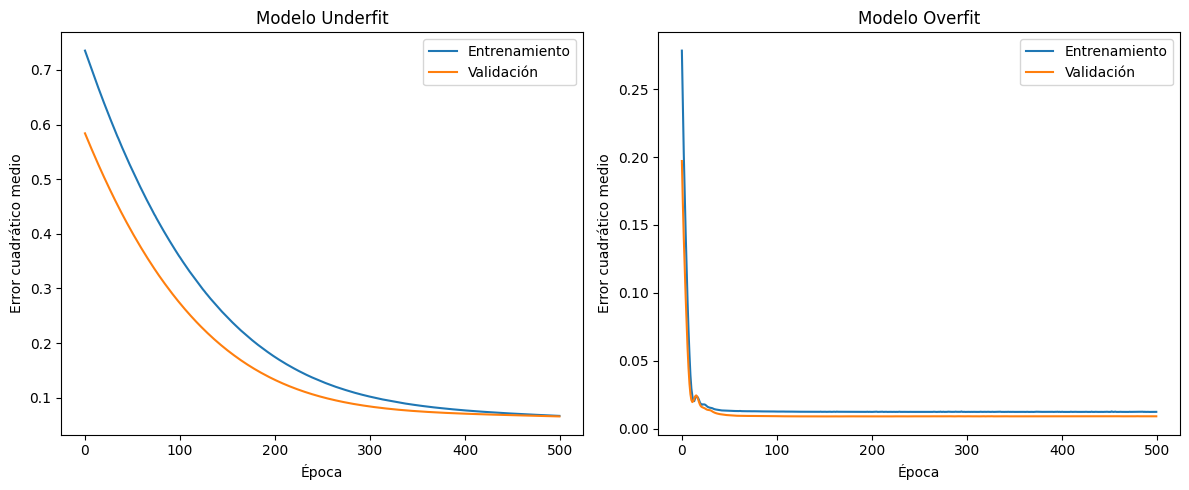

Pérdida en el modelo underfit: 0.0656
Pérdida en el modelo overfit: 0.0090


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Generar datos sintéticos
np.random.seed(50)
X = np.linspace(0, 1, 100)
y = X + 0.1 * np.random.randn(100)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

# Crear un MLP simple
model_underfit = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=1),
])

model_overfit = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

# Compilar los modelos
model_underfit.compile(optimizer='adam', loss='mse')
model_overfit.compile(optimizer='adam', loss='mse')

# Entrenar los modelos
epochs = 500

history_underfit = model_underfit.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
history_overfit = model_overfit.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)

# Evaluar los modelos en los datos de prueba
loss_underfit = model_underfit.evaluate(X_test, y_test)
loss_overfit = model_overfit.evaluate(X_test, y_test)

y_model_underfit = model_underfit.predict(X_test)
y_model_overfit = model_overfit.predict(X_test)

# Graficar resultados


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_underfit.history['loss'], label='Entrenamiento')
plt.plot(history_underfit.history['val_loss'], label='Validación')
plt.title('Modelo Underfit')
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_overfit.history['loss'], label='Entrenamiento')
plt.plot(history_overfit.history['val_loss'], label='Validación')
plt.title('Modelo Overfit')
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Pérdida en el modelo underfit: {loss_underfit:.4f}")
print(f"Pérdida en el modelo overfit: {loss_overfit:.4f}")

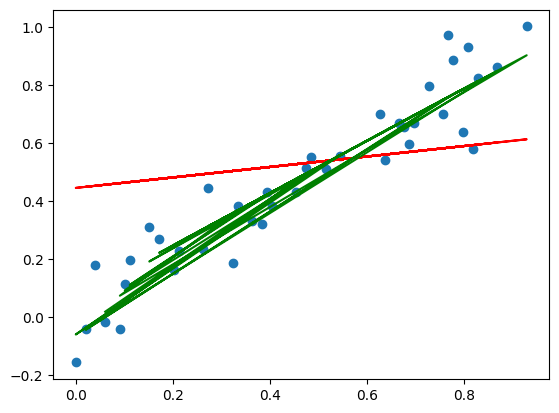

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_test,y_test,label='Real data')
ax.plot(X_test,y_model_underfit,'r')
ax.plot(X_test,y_model_overfit,'g')

plt.show()